# Newmann Ch 9 HW:  1, 2, 3, 4, 5, 7, 8, 9 (8 and 9 are worth 20 points each)

### Problem 1:

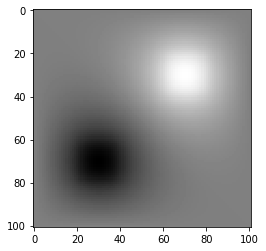

In [1]:
from numpy import sqrt, zeros
from pylab import imshow, show, gray

# Constants
epsilon_0 = 1
L = 1  # in meters
N = 100  # number of grid points on a side
a = L / N  # grid point spacing
rho_0 = 1 / sqrt(8.8541 * 10 ** -12)  # charge density scaled by sqrt(epsilon_0) (in SI) so epsilon_0 = 1
delta = 10 ** -6

def rho(i, j):
    if 20 < i < 40 and 60 < j < 80:
        return rho_0
    elif 60 < i < 80 and 20 < j < 40:
        return -rho_0
    else:
        return 0

def larger(a, b):
    if a >= b:
        return a
    else:
        return b

# Solve poisson's equation using Gauss-Seidel relaxation method
max_diff = 2 * delta
# initialize array
phi = zeros([N + 1, N + 1], float)

while max_diff > delta:
    #  reset max difference after each complete update of grid
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N:
                old_phi = phi[i,j]
                new_phi = (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1] \
                             + a ** 2 / 4 * rho(i, j)) / 4
                phi[i, j] = new_phi

                # note the largest change in phi in this update of the grid
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)


imshow(phi)
gray()
show()


### Problem 2:

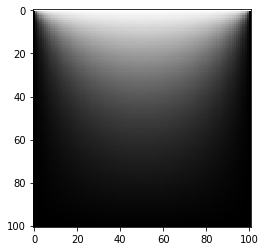

In [2]:
from numpy import zeros
from pylab import imshow, gray, show

# Constants
V = 1.0  # volts
a = 0.01  # grid spacing in meters
N = 100  # number of grid points
delta = 10 ** -6  # volts
omega = 0.9

def larger(a, b):
    if a >= b:
        return a
    else:
        return b


# Solve poisson's equation using Gauss-Seidel relaxation method
max_diff = 2 * delta
# initialize array
phi = zeros([N + 1, N + 1], float)
phi[0,:] = V
while max_diff > delta:
    #  reset max difference after each complete update of grid
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N:
                old_phi = phi[i,j]
                new_phi = (1 + omega) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 \
                          - omega * old_phi
                phi[i, j] = new_phi

                # note the largest change in phi in this update of the grid
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)


imshow(phi)
gray()
show()


### Problem 3:

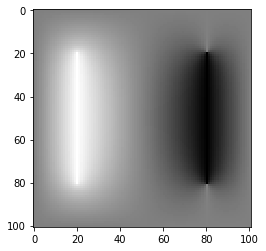

In [3]:
from numpy import zeros
from pylab import imshow, gray, show

# Constants
V = 1.0  # volts
a = 0.1  # grid spacing in centimeters
N = 100  # number of grid points
delta = 10 ** -6  # volts
omega = 0.9

def larger(a, b):
    if a >= b:
        return a
    else:
        return b


# Solve poisson's equation using Gauss-Seidel relaxation method
max_diff = 2 * delta
# initialize array
phi = zeros([N + 1, N + 1], float)
phi[20:81, 20] = V
phi[20:81, 80] = -V
while max_diff > delta:
    #  reset max difference after each complete update of grid
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N and not (20 <= i <= 80 and j == 20 or j == 80):
                old_phi = phi[i,j]
                new_phi = (1 + omega) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 \
                          - omega * old_phi
                phi[i, j] = new_phi

                # note the largest change in phi in this update of the grid
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)


imshow(phi)
gray()
show()


### Problem 4:

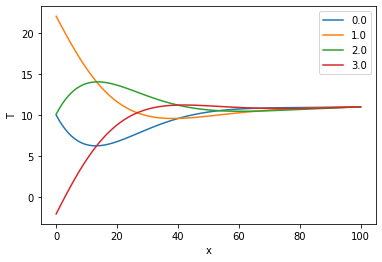

In [4]:
from pylab import *

A = 10
B = 12
tau = 365
D = 0.1
def T0(t):
    return A + B*sin(2*pi*t/tau)

L = 20     # Thickness of steel in meters
D = 0.1   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 0.01     # Time-step
#epsilon = h/1000

T = zeros(N+1,float)
T[1:N]=10


def iterate(T,t_min,t_max):
    # Main loop
    t = t_min
    c = h*D/a**2

    while t<t_max:

        # Calculate the new values of T
        T[0] = T0(t)
        T[N] = 11
        T[1:N] = T[1:N] + c*(T[2:N+1]+T[0:N-1]-2*T[1:N])

        #T,Tp = Tp,T
        t += h
    return T


T9 = iterate(T,0,365*9)

T9_i = T9
t_min = 365*9
for t_max in [365*9 + i*(365//4) for i in range(4)]:
    #t_max = t_min + 365//4
    T9_i = iterate(T9_i,t_min,t_max)
    plot(T9_i,label=t_max%365/(365//4))
    t_min = t_max

legend()
xlabel("x")
ylabel("T")
show()

### Problem 5:

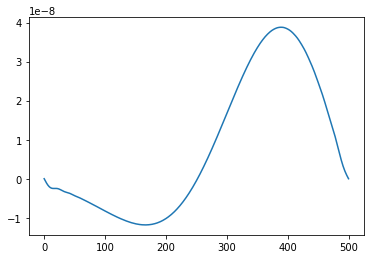

In [13]:
from pylab import *
from vpython import curve,rate,vector

h = 2e-6
L = 1
v = 100

d = 0.1
C = 1
sigma = 0.3
N = 500 # grid spacings
a = L/N

def phi0(x):
    return(C * x*(L-x)/L**2*exp(- (x-d)**2/2/sigma**2))

fi = zeros(N+1,float)

x = linspace(0,L,N+1)
phi = phi0(x)


def iterate(fi,phi,dt=50e-3):
    iterations = int(dt/h)
    for i in range(iterations):
        fi[1:N] += h*phi[1:N]
        phi[1:N] += h*v**2/a**2*(fi[2:N+1] + fi[0:N-1] - 2*fi[1:N])
        #t +=h
    return(fi,phi)


fi,phi = iterate(fi,phi)
plot(fi)
show()



c = curve()
for i in range(100):
    rate(30)
    c.append( pos=vector(x[i]-L/2,fi[i]*2e3,0 ))
    fi,phi = iterate(fi,phi)


### Problem 7:

### Problem 8:

In [ ]:
from pylab import *
from vpython import curve, rate
from scipy.linalg import solve_banded as banded

h = 1e-18*10
hbar = 1.0546e-36
L = 1e-8
M = 9.109e-31
N = 1000 # Grid slices

a = L/N

a1 = 1 + h*hbar/2/M/a**2*1j
a2 = -h*hbar*1j/4/M/a**2
b1 =  1 - h*hbar/2/M/a**2*1j
b2 =  h*hbar*1j/4/M/a**2

ksi = zeros(N+1,complex)

def ksi0(x):
    x0 = L/2
    sigma = 1e-10
    k = 5e10
    return exp(-(x-x0)**2/2/sigma**2)*exp(1j*k*x)

x = linspace(0,L,N+1)
ksi[:] = ksi0(x)
ksi[[0,N]]=0


A = empty((3,N),complex)

A[0,:] = a2
A[1,:] = a1
A[2:,] = a2

## ---------------------------------------------------------------------------##
for i in range(100):
    v = b1*ksi[1:N] + b2*(ksi[2:N+1] + ksi[0:N-1])
    ksi[1:N] = banded(A,v,1,1)
## ---------------------------------------------------------------------------##
plot(ksi)

## ---------------------------------------------------------------------------##
Ap = zeros((N-1,N-1),complex)
for i in range(N-2):
    Ap[i,i] = a2
    Ap[i+1,i] = a1 #Bottom
    Ap[i,i+1] = a1 #Right
Ap[N-2,N-2] = a2
## ---------------------------------------------------------------------------##

ksi_c = curve()
ksi = banded(A,v,1,1)
for i in range(100):
    rate(30)
    ksi_c.append(x[i]-L/2,real(ksi[i])*1e-9,imag(ksi[i])*1e-9)
    for i in range(20):
        v = b1*ksi[1:N] + b2*(ksi[2:N+1] + ksi[0:N-1])
        ksi[1:N] = banded(A,v,1,1)


plot(ksi)


### Problem 9:

C:\Users\Paul\anaconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
C:\Users\Paul\anaconda3\lib\site-packages\ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


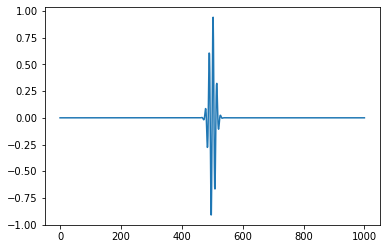

In [15]:
from pylab import *
from vpython import curve, rate


h = 2e-18*10
hbar = 1.0546e-36
L = 1e-8
M = 9.109e-31
N = 1000 # Grid slices

a = L/N

def complex_arg(trans):
    def f(y):
        return trans(real(y)) + 1j*trans(imag(y))

    return f

def dst(y):
    """
    dst transform for a real argument y
    """
    N = len(y)
    y2 = empty(2*N,float)
    y2[0] = y2[N] = 0.0
    y2[1:N] = y[1:]
    y2[:N:-1] = -y[1:]
    a = -imag(rfft(y2))[:N]
    a[0] = 0.0

    return a


######################################################################
# 1D inverse DST Type-I

def idst(a):
    N = len(a)
    c = empty(N+1,complex)
    c[0] = c[N] = 0.0
    c[1:N] = -1j*a[1:]
    y = irfft(c)[:N]
    y[0] = 0.0

    return y



ksi = zeros(N+1,complex)

def ksi0(x):
    x0 = L/2
    sigma = 1e-10
    k = 5e10
    return exp(-(x-x0)**2/2/sigma**2)*exp(1j*k*x)

x = linspace(0,L,N+1)
ksi[:] = ksi0(x)
ksi[[0,N]]=0

b0 = dst(ksi)

t = 1e-18
b_ = b0*exp(1j*pi**2*hbar*arange(1,N+2)**2/2/M/L**2*t)

ksi_ = idst(b_)
plot(ksi_)
show()
